<a href="https://colab.research.google.com/github/emmyliano/occurence-of-digits-and-strategy/blob/main/digits_ticks_occurrence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Digit 8 appeared 3 times in 10 ticks (Index 0-9)
Digit 5 appeared 3 times in 10 ticks (Index 1-10)
Digit 5 appeared 3 times in 10 ticks (Index 2-11)
Digit 5 appeared 3 times in 10 ticks (Index 3-12)
Digit 5 appeared 3 times in 10 ticks (Index 4-13)
Digit 5 appeared 3 times in 10 ticks (Index 5-14)
Digit 5 appeared 4 times in 10 ticks (Index 6-15)
Digit 5 appeared 4 times in 10 ticks (Index 7-16)
Digit 5 appeared 4 times in 10 ticks (Index 8-17)
Digit 5 appeared 4 times in 10 ticks (Index 9-18)
Digit 5 appeared 4 times in 10 ticks (Index 10-19)
Digit 5 appeared 3 times in 10 ticks (Index 11-20)
Digit 5 appeared 3 times in 10 ticks (Index 12-21)
Digit 5 appeared 3 times in 10 ticks (Index 13-22)
Digit 4 appeared 3 times in 10 ticks (Index 13-22)
Digit 4 appeared 3 times in 10 ticks (Index 14-23)
Digit 4 appeared 3 times in 10 ticks (Index 15-24)
Digit 4 appeared 3 times in 10 ticks (Index 16-25)
Digit 4 appeared 3 times in 10 ticks (Index 21-30)
Digit 4 appeared 3 times in 10 ticks (Inde

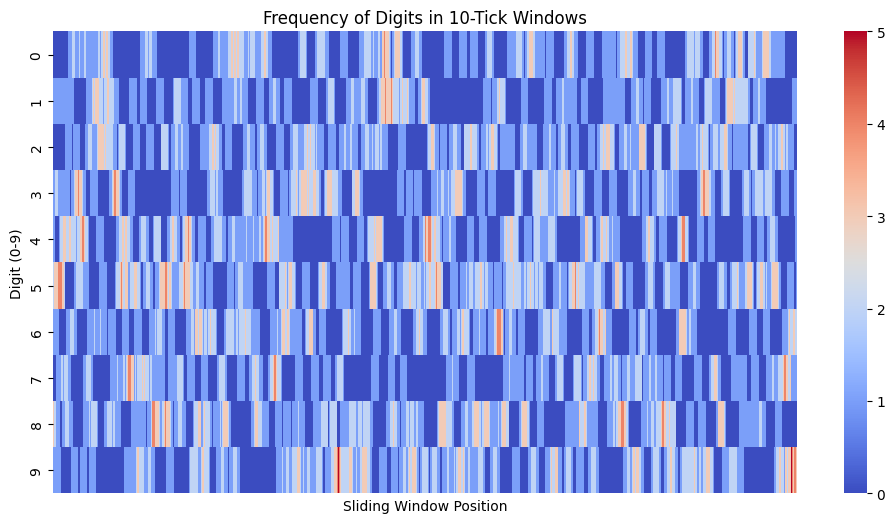


Trade Signal Analysis:
Total trade signals (4 appearances in a 10-tick window): 73
Failure rate for 1_tick: 2.74%
Failure rate for 2_ticks: 2.74%
Failure rate for 3_ticks: 0.00%


<ipython-input-1-e27e0d0805bb>:1089: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(failure_rates.keys()), y=list(failure_rates.values()), palette="viridis")


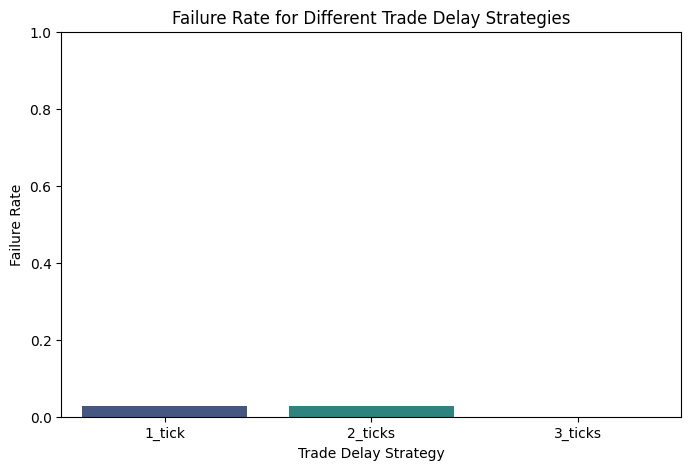

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Step 1: Load Your Data in "index:digit" Format ---
data = """
1:8
2:4
3:8
4:5
5:5
6:3
7:1
8:6
9:8
10:9
11:5
12:3
13:7
14:5
15:5
16:5
17:4
18:1
19:4
20:7
21:8
22:3
23:4
24:7
25:2
26:8
27:6
28:1
29:0
30:4
31:4
32:6
33:9
34:3
35:0
36:2
37:5
38:3
39:3
40:5
41:4
42:4
43:3
44:0
45:9
46:4
47:5
48:4
49:8
50:7
51:0
52:2
53:7
54:1
55:6
56:2
57:9
58:8
59:3
60:8
61:1
62:0
63:1
64:6
65:2
66:1
67:4
68:2
69:0
70:2
71:5
72:6
73:0
74:1
75:2
76:0
77:1
78:8
79:2
80:0
81:1
82:8
83:6
84:3
85:2
86:7
87:1
88:3
89:3
90:8
91:3
92:5
93:5
94:4
95:7
96:2
97:2
98:4
99:5
100:5
101:6
102:4
103:7
104:9
105:5
106:4
107:7
108:7
109:3
110:7
111:1
112:5
113:8
114:9
115:5
116:2
117:5
118:6
119:7
120:9
121:9
122:7
123:8
124:4
125:1
126:0
127:4
128:7
129:5
130:9
131:7
132:0
133:5
134:2
135:8
136:9
137:6
138:0
139:7
140:8
141:8
142:8
143:4
144:4
145:6
146:5
147:1
148:6
149:7
150:8
151:5
152:5
153:2
154:2
155:8
156:5
157:8
158:5
159:8
160:9
161:4
162:6
163:7
164:5
165:4
166:2
167:3
168:4
169:1
170:1
171:8
172:2
173:7
174:7
175:5
176:8
177:5
178:3
179:1
180:2
181:4
182:5
183:4
184:5
185:4
186:5
187:6
188:7
189:4
190:0
191:9
192:9
193:6
194:5
195:1
196:8
197:8
198:6
199:6
200:5
201:9
202:8
203:4
204:6
205:2
206:7
207:9
208:9
209:8
210:6
211:8
212:1
213:5
214:2
215:3
216:6
217:2
218:6
219:3
220:4
221:2
222:0
223:8
224:4
225:2
226:3
227:9
228:7
229:0
230:4
231:7
232:8
233:9
234:8
235:1
236:8
237:6
238:2
239:0
240:6
241:5
242:4
243:0
244:9
245:1
246:6
247:0
248:4
249:9
250:0
251:1
252:5
253:6
254:0
255:7
256:5
257:6
258:4
259:1
260:0
261:3
262:2
263:6
264:3
265:6
266:5
267:4
268:2
269:0
270:7
271:3
272:0
273:8
274:7
275:6
276:4
277:8
278:8
279:7
280:1
281:2
282:3
283:0
284:4
285:2
286:0
287:8
288:3
289:4
290:4
291:0
292:4
293:3
294:3
295:5
296:7
297:1
298:7
299:6
300:4
301:4
302:1
303:7
304:7
305:8
306:9
307:2
308:6
309:4
310:5
311:5
312:3
313:6
314:9
315:6
316:8
317:1
318:5
319:4
320:9
321:6
322:5
323:5
324:3
325:2
326:3
327:8
328:9
329:2
330:9
331:6
332:7
333:3
334:9
335:8
336:0
337:3
338:0
339:2
340:3
341:5
342:9
343:2
344:3
345:6
346:6
347:9
348:2
349:3
350:6
351:2
352:1
353:7
354:3
355:8
356:3
357:9
358:0
359:9
360:2
361:0
362:5
363:6
364:5
365:8
366:8
367:0
368:5
369:7
370:3
371:3
372:9
373:1
374:3
375:1
376:2
377:8
378:8
379:3
380:9
381:4
382:9
383:9
384:3
385:7
386:5
387:7
388:9
389:9
390:2
391:8
392:0
393:4
394:6
395:5
396:6
397:2
398:9
399:9
400:1
401:8
402:6
403:8
404:9
405:2
406:1
407:3
408:3
409:5
410:6
411:8
412:3
413:9
414:4
415:1
416:8
417:0
418:9
419:1
420:2
421:9
422:8
423:0
424:9
425:2
426:8
427:0
428:4
429:4
430:5
431:5
432:5
433:7
434:2
435:0
436:6
437:4
438:2
439:4
440:4
441:1
442:0
443:1
444:9
445:2
446:1
447:0
448:0
449:5
450:0
451:1
452:1
453:8
454:5
455:7
456:1
457:6
458:8
459:9
460:1
461:0
462:8
463:6
464:0
465:0
466:1
467:3
468:5
469:2
470:9
471:7
472:1
473:8
474:1
475:9
476:5
477:4
478:5
479:3
480:8
481:1
482:9
483:5
484:9
485:8
486:0
487:9
488:6
489:5
490:3
491:0
492:6
493:8
494:5
495:1
496:4
497:6
498:9
499:1
500:9
501:1
502:4
503:5
504:4
505:4
506:5
507:2
508:2
509:4
510:5
511:9
512:3
513:2
514:9
515:4
516:5
517:4
518:5
519:5
520:3
521:8
522:8
523:8
524:2
525:6
526:3
527:9
528:6
529:4
530:0
531:8
532:7
533:8
534:9
535:3
536:4
537:2
538:5
539:3
540:7
541:6
542:2
543:9
544:3
545:3
546:9
547:6
548:9
549:3
550:0
551:5
552:8
553:6
554:6
555:9
556:2
557:2
558:8
559:5
560:4
561:7
562:9
563:5
564:2
565:0
566:2
567:8
568:6
569:8
570:8
571:5
572:9
573:5
574:3
575:9
576:6
577:4
578:5
579:2
580:8
581:8
582:1
583:8
584:0
585:5
586:2
587:0
588:6
589:3
590:2
591:9
592:2
593:8
594:1
595:9
596:6
597:5
598:6
599:6
600:6
601:1
602:8
603:1
604:4
605:2
606:8
607:8
608:7
609:5
610:4
611:6
612:4
613:5
614:0
615:2
616:6
617:7
618:4
619:5
620:4
621:9
622:5
623:3
624:0
625:3
626:0
627:7
628:6
629:5
630:8
631:2
632:1
633:8
634:8
635:2
636:5
637:4
638:0
639:7
640:5
641:0
642:9
643:0
644:2
645:5
646:9
647:3
648:4
649:3
650:4
651:5
652:7
653:8
654:0
655:6
656:5
657:3
658:3
659:7
660:4
661:6
662:2
663:1
664:9
665:6
666:0
667:3
668:4
669:2
670:4
671:9
672:9
673:6
674:6
675:5
676:3
677:9
678:7
679:1
680:7
681:2
682:3
683:5
684:6
685:2
686:3
687:1
688:3
689:9
690:0
691:8
692:9
693:0
694:3
695:5
696:5
697:1
698:0
699:2
700:5
701:8
702:7
703:7
704:5
705:3
706:9
707:3
708:5
709:8
710:8
711:4
712:1
713:6
714:5
715:7
716:8
717:4
718:4
719:0
720:7
721:2
722:9
723:7
724:5
725:8
726:9
727:6
728:7
729:5
730:3
731:6
732:4
733:2
734:5
735:6
736:6
737:4
738:2
739:4
740:0
741:2
742:1
743:7
744:6
745:4
746:2
747:8
748:2
749:0
750:3
751:7
752:1
753:5
754:4
755:8
756:7
757:5
758:5
759:8
760:0
761:1
762:8
763:2
764:0
765:8
766:8
767:7
768:9
769:2
770:0
771:0
772:5
773:7
774:9
775:3
776:6
777:2
778:0
779:1
780:9
781:3
782:9
783:7
784:7
785:1
786:9
787:2
788:6
789:2
790:2
791:6
792:8
793:3
794:4
795:7
796:1
797:0
798:5
799:4
800:8
801:5
802:4
803:7
804:6
805:8
806:9
807:3
808:9
809:2
810:2
811:7
812:8
813:3
814:0
815:8
816:4
817:3
818:8
819:1
820:8
821:5
822:7
823:9
824:5
825:3
826:1
827:9
828:8
829:8
830:2
831:9
832:2
833:3
834:5
835:1
836:1
837:7
838:6
839:2
840:4
841:4
842:6
843:6
844:9
845:4
846:4
847:9
848:6
849:2
850:0
851:1
852:8
853:0
854:9
855:5
856:6
857:9
858:2
859:1
860:0
861:5
862:9
863:7
864:0
865:2
866:4
867:3
868:8
869:9
870:3
871:2
872:3
873:2
874:9
875:3
876:1
877:1
878:9
879:9
880:3
881:4
882:0
883:7
884:2
885:7
886:0
887:1
888:2
889:7
890:0
891:0
892:8
893:5
894:8
895:8
896:5
897:2
898:2
899:3
900:9
901:3
902:0
903:2
904:1
905:1
906:0
907:1
908:6
909:9
910:9
911:5
912:7
913:5
914:1
915:2
916:1
917:0
918:0
919:9
920:5
921:0
922:8
923:7
924:1
925:2
926:3
927:1
928:4
929:3
930:5
931:5
932:8
933:5
934:0
935:0
936:6
937:2
938:2
939:7
940:3
941:1
942:0
943:8
944:3
945:5
946:4
947:5
948:1
949:8
950:5
951:3
952:0
953:0
954:6
955:0
956:2
957:3
958:5
959:7
960:4
961:3
962:2
963:0
964:4
965:5
966:5
967:7
968:5
969:9
970:8
971:2
972:9
973:0
974:2
975:7
976:9
977:7
978:2
979:3
980:6
981:7
982:7
983:9
984:9
985:2
986:5
987:6
988:9
989:6
990:7
991:9
992:9
993:1
994:6
995:9
996:3
997:4
998:5
999:5
1000:5
"""

# Convert the string into a list of integers by parsing each line.
# Each line is expected to be in the format "index:digit"
lines = [line.strip() for line in data.strip().splitlines() if line.strip() != ""]
digits = []
for line in lines:
    try:
        # Split by colon and take the second element (the digit)
        parts = line.split(":")
        # Append the digit as an integer
        digits.append(int(parts[1].strip()))
    except Exception as e:
        print(f"Error processing line '{line}': {e}")

# If you're expecting 1000 digits, you might want to check:
assert len(digits) == 1000, f"Error: The data must contain exactly 1000 digits (currently {len(digits)})."
# For this test sample, comment out the assertion:
# assert len(digits) == 1000, "Error: The data must contain exactly 1000 digits."

# --- Step 2: Sliding Window Analysis (Window Size = 10) ---
window_size = 10
occurrence_data = []  # Store results for visualization

# We'll also simulate trade conditions:
# When a digit appears exactly 4 times in a window, we'll check subsequent ticks.
trade_signals = 0
failures = {'1_tick': 0, '2_ticks': 0, '3_ticks': 0}

# Iterate over each sliding window (shift by 1 tick)
for i in range(len(digits) - window_size):
    window = digits[i:i + window_size]
    counts = Counter(window)
    occurrence_data.append(counts)

    # Log occurrences for quick terminal insights
    for num, freq in counts.items():
        if 3 <= freq <= 7:
            print(f"Digit {num} appeared {freq} times in 10 ticks (Index {i}-{i+window_size-1})")

    # --- Trade Signal and Strategy Check ---
    # If a digit appears exactly 4 times in the window, consider that a trade signal.
    for num, freq in counts.items():
        if freq == 4:
            trade_signals += 1
            # Strategy 1: Immediate next tick (1 tick delay): index i+10
            if i + window_size < len(digits) and digits[i + window_size] == num:
                failures['1_tick'] += 1
            # Strategy 2: Wait one extra tick (2 tick delay): index i+11
            if i + window_size + 1 < len(digits) and digits[i + window_size + 1] == num:
                failures['2_ticks'] += 1
            # Strategy 3: Wait two extra ticks (3 tick delay): index i+12
            if i + window_size + 2 < len(digits) and digits[i + window_size + 2] == num:
                failures['3_ticks'] += 1

# --- Step 3: Visualization of Occurrence Data as a Heatmap ---
# Create a heatmap matrix: rows for digits (0-9), columns for each window position.
heatmap_data = np.zeros((10, len(occurrence_data)))
for i, window_counts in enumerate(occurrence_data):
    for digit in range(10):
        heatmap_data[digit, i] = window_counts.get(digit, 0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', xticklabels=False, yticklabels=range(10))
plt.xlabel("Sliding Window Position")
plt.ylabel("Digit (0-9)")
plt.title("Frequency of Digits in 10-Tick Windows")
plt.show()

# --- Step 4: Analyze and Visualize Trade Strategy Failure Rates ---
# Compute failure rates for each strategy:
failure_rates = {strategy: (failures[strategy] / trade_signals if trade_signals > 0 else 0)
                 for strategy in failures}

print("\nTrade Signal Analysis:")
print(f"Total trade signals (4 appearances in a 10-tick window): {trade_signals}")
for strategy, rate in failure_rates.items():
    print(f"Failure rate for {strategy}: {rate:.2%}")

# Visualize failure rates using a bar chart:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(failure_rates.keys()), y=list(failure_rates.values()), palette="viridis")
plt.xlabel("Trade Delay Strategy")
plt.ylabel("Failure Rate")
plt.title("Failure Rate for Different Trade Delay Strategies")
plt.ylim(0, 1)
plt.show()


Digit 0 appeared 3 times in 10 ticks (Index 3-12)
Digit 0 appeared 3 times in 10 ticks (Index 4-13)
Digit 0 appeared 4 times in 10 ticks (Index 5-14)
Digit 0 appeared 4 times in 10 ticks (Index 6-15)
Digit 0 appeared 4 times in 10 ticks (Index 7-16)
Digit 2 appeared 3 times in 10 ticks (Index 7-16)
Digit 0 appeared 4 times in 10 ticks (Index 8-17)
Digit 2 appeared 3 times in 10 ticks (Index 8-17)
Digit 2 appeared 4 times in 10 ticks (Index 9-18)
Digit 0 appeared 3 times in 10 ticks (Index 9-18)
Digit 2 appeared 4 times in 10 ticks (Index 10-19)
Digit 3 appeared 3 times in 10 ticks (Index 10-19)
Digit 0 appeared 3 times in 10 ticks (Index 10-19)
Digit 3 appeared 3 times in 10 ticks (Index 11-20)
Digit 0 appeared 3 times in 10 ticks (Index 11-20)
Digit 2 appeared 4 times in 10 ticks (Index 11-20)
Digit 0 appeared 3 times in 10 ticks (Index 12-21)
Digit 2 appeared 5 times in 10 ticks (Index 12-21)
Digit 2 appeared 5 times in 10 ticks (Index 13-22)
Digit 3 appeared 3 times in 10 ticks (Ind

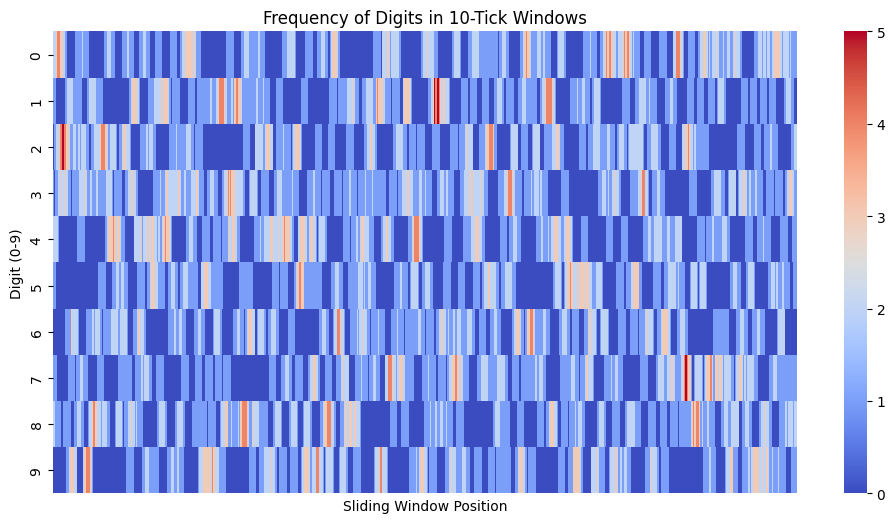


Trade Signal Analysis:
Total trade signals (4 appearances in a 10-tick window): 142
Failure rate for 1_tick: 7.04%
Failure rate for 2_ticks: 7.75%
Failure rate for 3_ticks: 7.04%
Failure rate for 4_ticks: 5.63%
Failure rate for 5_ticks: 8.45%
Failure rate for 6_ticks: 10.56%
Failure rate for 7_ticks: 9.86%


<ipython-input-6-6c02059b2e92>:1102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(failure_rates.keys()), y=list(failure_rates.values()), palette="viridis")


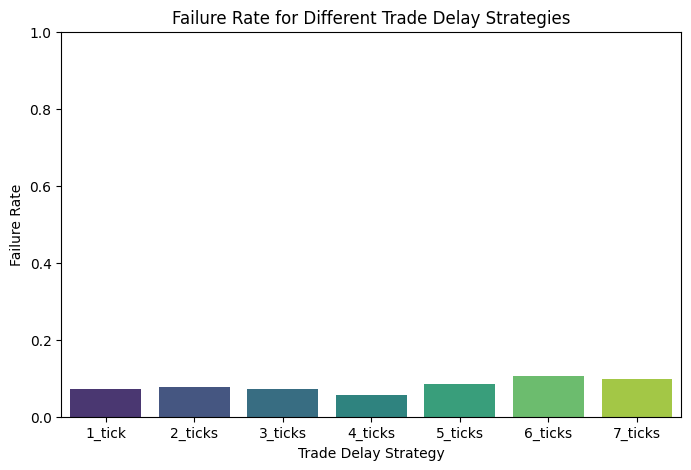

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Step 1: Load Your Data in "index:digit" Format ---
data = """
1:3
2:8
3:5
4:1
5:7
6:4
7:4
8:0
9:0
10:8
11:2
12:3
13:0
14:2
15:0
16:3
17:2
18:0
19:2
20:3
21:2
22:2
23:8
24:3
25:6
26:1
27:9
28:1
29:7
30:2
31:9
32:9
33:6
34:6
35:3
36:2
37:8
38:1
39:0
40:7
41:8
42:4
43:2
44:3
45:3
46:7
47:2
48:0
49:9
50:9
51:9
52:3
53:9
54:6
55:1
56:8
57:1
58:8
59:3
60:2
61:8
62:6
63:8
64:2
65:6
66:1
67:3
68:7
69:2
70:5
71:8
72:2
73:2
74:2
75:8
76:6
77:0
78:3
79:4
80:3
81:4
82:0
83:4
84:2
85:2
86:6
87:6
88:5
89:4
90:4
91:3
92:8
93:8
94:5
95:4
96:7
97:2
98:6
99:6
100:5
101:0
102:2
103:2
104:8
105:7
106:3
107:9
108:0
109:8
110:3
111:1
112:8
113:3
114:1
115:1
116:6
117:4
118:4
119:7
120:8
121:6
122:5
123:6
124:0
125:4
126:2
127:7
128:9
129:0
130:4
131:7
132:9
133:2
134:4
135:5
136:1
137:2
138:4
139:5
140:5
141:9
142:4
143:3
144:1
145:0
146:1
147:7
148:8
149:5
150:4
151:8
152:3
153:1
154:1
155:4
156:4
157:1
158:4
159:3
160:3
161:9
162:5
163:6
164:2
165:0
166:5
167:9
168:1
169:3
170:3
171:6
172:8
173:2
174:9
175:8
176:3
177:6
178:0
179:5
180:7
181:0
182:5
183:2
184:3
185:0
186:4
187:2
188:0
189:1
190:0
191:4
192:5
193:3
194:3
195:8
196:0
197:6
198:7
199:2
200:3
201:1
202:6
203:9
204:9
205:8
206:5
207:5
208:4
209:9
210:5
211:1
212:7
213:9
214:3
215:9
216:8
217:5
218:1
219:3
220:9
221:9
222:6
223:4
224:6
225:7
226:5
227:1
228:1
229:1
230:9
231:1
232:8
233:8
234:3
235:4
236:7
237:3
238:8
239:1
240:0
241:3
242:4
243:3
244:4
245:3
246:1
247:8
248:4
249:6
250:1
251:1
252:3
253:1
254:6
255:3
256:8
257:5
258:8
259:8
260:0
261:8
262:2
263:1
264:0
265:6
266:5
267:8
268:6
269:6
270:9
271:3
272:3
273:1
274:8
275:0
276:8
277:4
278:2
279:2
280:1
281:6
282:0
283:6
284:9
285:4
286:8
287:3
288:2
289:1
290:9
291:4
292:2
293:2
294:4
295:9
296:6
297:7
298:9
299:4
300:6
301:5
302:4
303:8
304:3
305:8
306:1
307:2
308:3
309:4
310:4
311:9
312:5
313:7
314:0
315:4
316:2
317:4
318:7
319:3
320:4
321:0
322:6
323:0
324:8
325:9
326:8
327:3
328:2
329:2
330:5
331:2
332:7
333:5
334:5
335:4
336:4
337:5
338:4
339:1
340:9
341:9
342:8
343:9
344:8
345:0
346:4
347:5
348:3
349:7
350:4
351:4
352:7
353:9
354:9
355:7
356:3
357:5
358:2
359:9
360:9
361:0
362:4
363:6
364:4
365:8
366:0
367:6
368:3
369:8
370:8
371:7
372:9
373:9
374:8
375:2
376:8
377:1
378:0
379:0
380:5
381:0
382:6
383:6
384:3
385:5
386:7
387:6
388:6
389:1
390:9
391:8
392:9
393:7
394:7
395:4
396:3
397:8
398:8
399:1
400:2
401:1
402:5
403:8
404:3
405:6
406:4
407:1
408:8
409:9
410:8
411:7
412:5
413:4
414:6
415:5
416:3
417:6
418:4
419:7
420:4
421:1
422:6
423:5
424:2
425:3
426:1
427:4
428:2
429:5
430:7
431:2
432:1
433:6
434:3
435:7
436:0
437:9
438:9
439:1
440:1
441:1
442:6
443:3
444:9
445:9
446:4
447:0
448:0
449:4
450:1
451:7
452:7
453:4
454:0
455:7
456:7
457:3
458:8
459:6
460:0
461:1
462:2
463:0
464:5
465:7
466:2
467:6
468:7
469:3
470:7
471:2
472:5
473:8
474:3
475:1
476:1
477:1
478:6
479:3
480:7
481:3
482:4
483:2
484:9
485:5
486:5
487:4
488:4
489:6
490:4
491:3
492:4
493:9
494:2
495:6
496:3
497:9
498:9
499:0
500:7
501:5
502:0
503:8
504:3
505:5
506:6
507:0
508:1
509:7
510:9
511:8
512:0
513:1
514:2
515:1
516:1
517:1
518:8
519:6
520:3
521:1
522:7
523:6
524:8
525:3
526:6
527:1
528:1
529:5
530:4
531:9
532:8
533:3
534:7
535:6
536:9
537:7
538:2
539:9
540:7
541:0
542:6
543:0
544:7
545:7
546:8
547:6
548:5
549:9
550:2
551:3
552:1
553:7
554:9
555:4
556:3
557:6
558:2
559:2
560:3
561:6
562:0
563:3
564:1
565:4
566:4
567:0
568:5
569:3
570:9
571:4
572:0
573:3
574:7
575:4
576:6
577:2
578:3
579:7
580:1
581:5
582:0
583:5
584:7
585:2
586:2
587:2
588:9
589:5
590:2
591:6
592:0
593:5
594:7
595:8
596:6
597:1
598:8
599:9
600:1
601:7
602:3
603:0
604:4
605:7
606:5
607:0
608:8
609:9
610:3
611:5
612:3
613:1
614:3
615:3
616:5
617:4
618:2
619:2
620:7
621:6
622:4
623:6
624:3
625:9
626:6
627:8
628:9
629:1
630:9
631:0
632:2
633:7
634:1
635:0
636:0
637:3
638:6
639:0
640:6
641:6
642:9
643:7
644:1
645:6
646:3
647:2
648:2
649:0
650:3
651:7
652:4
653:8
654:0
655:6
656:7
657:1
658:3
659:4
660:1
661:6
662:0
663:2
664:1
665:1
666:8
667:1
668:4
669:1
670:8
671:8
672:4
673:2
674:2
675:5
676:4
677:5
678:4
679:2
680:0
681:9
682:0
683:6
684:7
685:8
686:3
687:6
688:4
689:5
690:4
691:5
692:4
693:5
694:7
695:9
696:8
697:5
698:1
699:7
700:6
701:9
702:9
703:5
704:8
705:9
706:5
707:1
708:8
709:2
710:5
711:7
712:4
713:5
714:1
715:0
716:6
717:5
718:7
719:7
720:5
721:2
722:6
723:6
724:0
725:9
726:9
727:1
728:2
729:1
730:5
731:2
732:5
733:8
734:9
735:3
736:8
737:0
738:6
739:6
740:3
741:2
742:0
743:7
744:0
745:4
746:0
747:2
748:3
749:0
750:9
751:9
752:7
753:3
754:8
755:0
756:3
757:9
758:7
759:5
760:2
761:0
762:6
763:2
764:9
765:4
766:0
767:1
768:0
769:9
770:0
771:8
772:5
773:0
774:8
775:2
776:2
777:3
778:6
779:5
780:5
781:0
782:8
783:5
784:1
785:2
786:2
787:3
788:3
789:1
790:6
791:7
792:3
793:3
794:1
795:4
796:0
797:9
798:6
799:6
800:2
801:4
802:8
803:1
804:9
805:2
806:9
807:3
808:5
809:2
810:4
811:4
812:7
813:6
814:3
815:7
816:0
817:8
818:6
819:9
820:6
821:4
822:6
823:5
824:1
825:7
826:4
827:7
828:5
829:2
830:1
831:8
832:7
833:5
834:0
835:0
836:4
837:4
838:0
839:0
840:6
841:5
842:8
843:7
844:6
845:7
846:2
847:2
848:7
849:7
850:7
851:2
852:8
853:1
854:0
855:2
856:3
857:5
858:5
859:8
860:8
861:8
862:2
863:7
864:7
865:8
866:1
867:4
868:0
869:5
870:5
871:0
872:2
873:8
874:0
875:9
876:7
877:7
878:7
879:4
880:8
881:1
882:9
883:0
884:7
885:3
886:0
887:4
888:6
889:3
890:7
891:7
892:0
893:1
894:3
895:1
896:7
897:4
898:8
899:6
900:4
901:0
902:7
903:8
904:9
905:9
906:7
907:0
908:3
909:3
910:5
911:9
912:8
913:8
914:0
915:5
916:0
917:7
918:7
919:6
920:2
921:3
922:7
923:3
924:6
925:1
926:8
927:9
928:3
929:7
930:8
931:4
932:5
933:7
934:5
935:9
936:3
937:1
938:7
939:9
940:6
941:9
942:2
943:0
944:3
945:9
946:4
947:6
948:0
949:8
950:1
951:9
952:8
953:9
954:0
955:4
956:2
957:8
958:9
959:3
960:0
961:5
962:1
963:7
964:2
965:5
966:9
967:0
968:7
969:0
970:0
971:3
972:5
973:6
974:6
975:9
976:8
977:4
978:7
979:0
980:5
981:0
982:1
983:3
984:8
985:1
986:3
987:8
988:7
989:3
990:0
991:9
992:2
993:4
994:5
995:8
996:2
997:8
998:7
999:6
1000:9
"""

# Convert the string into a list of integers by parsing each line.
# Each line is expected to be in the format "index:digit"
lines = [line.strip() for line in data.strip().splitlines() if line.strip() != ""]
digits = []
for line in lines:
    try:
        # Split by colon and take the second element (the digit)
        parts = line.split(":")
        # Append the digit as an integer
        digits.append(int(parts[1].strip()))
    except Exception as e:
        print(f"Error processing line '{line}': {e}")

# If you're expecting 1000 digits, you might want to check:
assert len(digits) == 1000, f"Error: The data must contain exactly 1000 digits (currently {len(digits)})."
# For this test sample, comment out the assertion:
# assert len(digits) == 1000, "Error: The data must contain exactly 1000 digits."

# --- Step 2: Sliding Window Analysis (Window Size = 10) ---
window_size = 10
occurrence_data = []  # Store results for visualization

# We'll also simulate trade conditions:
# When a digit appears exactly 4 times in a window, we'll check subsequent ticks.
trade_signals = 0
failures = {'1_tick': 0, '2_ticks': 0, '3_ticks': 0, '4_ticks': 0, '5_ticks': 0, '6_ticks': 0, '7_ticks': 0}

# Iterate over each sliding window (shift by 1 tick)
for i in range(len(digits) - window_size):
    window = digits[i:i + window_size]
    counts = Counter(window)
    occurrence_data.append(counts)

    # Log occurrences for quick terminal insights
    for num, freq in counts.items():
        if 3 <= freq <= 7:
            print(f"Digit {num} appeared {freq} times in 10 ticks (Index {i}-{i+window_size-1})")

    # --- Trade Signal and Strategy Check ---
    # If a digit appears exactly 4 times in the window, consider that a trade signal.
    for num, freq in counts.items():
        if freq == 4:
            trade_signals += 1
            # Strategy 1: Immediate next tick (1 tick delay): index i+10
            if i + window_size < len(digits) and digits[i + window_size] == num:
                failures['1_tick'] += 1
            # Strategy 2: Wait one extra tick (2 tick delay): index i+11
            if i + window_size + 1 < len(digits) and digits[i + window_size + 1] == num:
                failures['2_ticks'] += 1
            # Strategy 3: Wait two extra ticks (3 tick delay): index i+12
            if i + window_size + 2 < len(digits) and digits[i + window_size + 2] == num:
                failures['3_ticks'] += 1
            # Strategy 4: Wait three extra ticks (4 tick delay): index i+13
            if i + window_size + 3 < len(digits) and digits[i + window_size + 3] == num:
                failures['4_ticks'] += 1
            # Strategy 5: Wait four extra ticks (5 tick delay): index i+14
            if i + window_size + 4 < len(digits) and digits[i + window_size + 4] == num:
                failures['5_ticks'] += 1
            # Strategy 6: Wait five extra ticks (6 tick delay): index i+15
            if i + window_size + 5 < len(digits) and digits[i + window_size + 5] == num:
                failures['6_ticks'] += 1
            # Strategy 7: Wait Six extra ticks (7 tick delay): index i+16
            if i + window_size + 6 < len(digits) and digits[i + window_size + 6] == num:
                failures['7_ticks'] += 1


# --- Step 3: Visualization of Occurrence Data as a Heatmap ---
# Create a heatmap matrix: rows for digits (0-9), columns for each window position.
heatmap_data = np.zeros((10, len(occurrence_data)))
for i, window_counts in enumerate(occurrence_data):
    for digit in range(10):
        heatmap_data[digit, i] = window_counts.get(digit, 0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', xticklabels=False, yticklabels=range(10))
plt.xlabel("Sliding Window Position")
plt.ylabel("Digit (0-9)")
plt.title("Frequency of Digits in 10-Tick Windows")
plt.show()

# --- Step 4: Analyze and Visualize Trade Strategy Failure Rates ---
# Compute failure rates for each strategy:
failure_rates = {strategy: (failures[strategy] / trade_signals if trade_signals > 0 else 0)
                 for strategy in failures}

print("\nTrade Signal Analysis:")
print(f"Total trade signals (4 appearances in a 10-tick window): {trade_signals}")
for strategy, rate in failure_rates.items():
    print(f"Failure rate for {strategy}: {rate:.2%}")

# Visualize failure rates using a bar chart:
plt.figure(figsize=(8, 5))
sns.barplot(x=list(failure_rates.keys()), y=list(failure_rates.values()), palette="viridis")
plt.xlabel("Trade Delay Strategy")
plt.ylabel("Failure Rate")
plt.title("Failure Rate for Different Trade Delay Strategies")
plt.ylim(0, 1)
plt.show()